# 5.1 Surprise 기본 활용 방법

In [1]:
#!pip install scikit-surprise

In [2]:
import numpy as np

from surprise import BaselineOnly, KNNWithMeans, SVD, SVDpp, Dataset, accuracy, Reader
from surprise.model_selection import cross_validate, train_test_split

data = Dataset.load_builtin(name='ml-100k')

# train test 분리
trainset, testset = train_test_split(data, test_size=0.25)

algo = KNNWithMeans()

algo.fit(trainset)

prediction = algo.test(testset)

accuracy.rmse(prediction)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9566


0.9566021844030169

# 5.2 알고리즘 비교

Estimating biases using als...
RMSE: 0.9420
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9512
RMSE: 0.9345
RMSE: 0.9208


array([0.92080759, 0.9345095 , 0.941986  , 0.95123484])

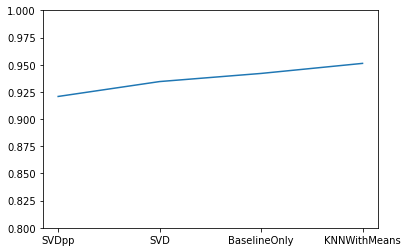

In [3]:
#비교에 필요한 Surprise 알고리즘
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp

# 정확도 측정 관련 모듈을 가져온다.
from surprise import accuracy

# Dataset관련 모듈을 가져온다.
from surprise import Dataset

# train/test set 분리 관련 모듈을 가져온다.
from surprise.model_selection import train_test_split

# 결과를 그래프로 표시하기 위한 라이브러리
import matplotlib.pyplot as plt

# MovieLens 100k 데이터 불러오기
data = Dataset.load_builtin(name=u'ml-100k')

# train/test 0.75 : 0.25로 분리

trainset, testset = train_test_split(data, test_size=0.25)

algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]

names = []
results = []

for option in algorithms:
    algo = option()
    names.append(option.__name__)
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
names = np.array(names)
results = np.array(results)

index = np.argsort(results)
plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
results[index]

# 5.3 알고리즘 옵션 지정

In [4]:
# 알고리즘 옵션에 대해 딕셔너리 형태로 저장
sim_options = {'name': 'pearson_baseline', # name에다가 유사도 지표의 종류를 설정
               'user_based': True}          # True는 유저 베이스 CF
algo = KNNWithMeans(k=30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9399


0.9399320564069582

# 5.4 다양한 조건의 비교

In [5]:
# 집단과 사용자의 평가경향을 함께 고려한 CF 알고리즘
from surprise import KNNWithMeans

# Dataset관련 모듈을 가져온다.
from surprise import Dataset

# 정확도 측정 관련 모듈을 가져온다.
from surprise import accuracy

# train/test set 분리 관련 모듈을 가져온다.
from surprise.model_selection import train_test_split

data = Dataset.load_builtin(name=u'ml-100k')

# train/test 0.75 : 0.25로 분리
trainset, testset = train_test_split(data, test_size=0.25)

result = []

for neighbor_size in (10, 20, 30, 40, 50, 60):
    algo = KNNWithMeans(k=neighbor_size, 
                        sim_options={'name':'pearson_baseline', 
                        'user_based': True})
    algo.fit(trainset)
    predictions = algo.test(testset)
    result.append([neighbor_size, accuracy.rmse(predictions)])

result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9613
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9481
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9456
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9454
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9455
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9458


[[10, 0.9613315707363571],
 [20, 0.9480987237220185],
 [30, 0.9456218907663596],
 [40, 0.9453857146472053],
 [50, 0.9455253980578735],
 [60, 0.9457836179502214]]

In [6]:
# KNN 다양한 파라미터 비교
# Grid Search를 위한 모듈 가져오기
from surprise.model_selection import GridSearchCV
param_grid = {
    'k': [5, 10, 15, 25],
    'sim_options': {'name': ['pearson_baseline', 'cosine'],     # 리스트 형태로 만듦.
                    'user_based': [True, False]
    }
}

gs = GridSearchCV(KNNWithMeans,
                param_grid, 
                measures=['rmse'], 
                cv=4)                   # cv란?데이터를 몇개의 세트로 나누어 크로스 밸류에이션 할것인지? 정확도를 4번 계산하여 평균을 계산함.

gs.fit(data)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar

In [8]:
# SVD 다양한 파라미터 비교

from surprise import SVD
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_epochs': [70, 80, 90],
    'lr_all': [0.005, 0.006, 0.007],
    'reg_all': [0.05, 0.07, 0.1]
}
gs = GridSearchCV(algo_class = SVD,
                param_grid = param_grid,
                measures=['rmse'],
                cv=4)
gs.fit(data)

print(gs.best_score['rmse'])

print(gs.best_params['rmse'])

0.9124364209781067
{'n_epochs': 80, 'lr_all': 0.005, 'reg_all': 0.1}


# 5.5 외부 데이터 사용

In [11]:
# csv 파일에서 불러오기
import pandas as pd
# 데이터 읽기 관련된 모듈을 가져온다.
from surprise import Reader
# Dataset 관련 모듈을 가져온다.
from surprise import Dataset

# DataFrame 형태로 데이터를 읽어온다.
r_cols = ['user_id', 'movie_id', 'rating','timestamp']
ratings = pd.read_csv('./Data/u.data',
                        names=r_cols,
                        sep='\t',
                        encoding='latin-1')

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)